**Universidad Autónoma Metropolitana - Unidad Iztapalapa (UAM-I)**

**Maestría en Matemáticas Aplicadas e Industriales (MCMAI)**

**Taller de Modelado Matemático II - Parte I**

> Trimestre 25-P

**Profesor**: 
    
> Dr. Alejandro Román Vásquez

**Alumnos**: 
    
> Alan Badillo Salas
> 
> Brandon Eduardo Antonio Gómez
> 
> Diego

# Introducción

En esta **Tarea 1** analizaremos el conjunto de datos sobre el precio de casas en Iowa y Ames.

Los objetivos particulares serán: 

* Importación de los datos
* Exploración inicial
* Ingeniería de variables
* Tratamiento de datos faltantes
* Análisis de la distribución de la respuesta
* Relación de la respuesta con las preditoras

Para conseguirlo, comenzaremos a describir cada paso, empezando por la importación y exploración de los ejes de datos, para seguir con la construcción de variables, el tratamiento a datos faltantes y finalmente los posteriores análisis basados en las predictoras y la respuesta.

# Adquisición de los datos

Para la primera parte debemos importar las librerías que utilizaremos durante todo el análisis y adquirir los datos usando la librería de *Pandas*.

La documentación de las librerías la podemos consultar en:

> Numpy - http://numpy.org/
>
> Pandas - http://pandas.pydata.org/
>
> Matplotlib - http://matplotlib.org/
>
> Seaborn - http://seaborn.pydata.org

## Importación de las librerías

Usaremos la forma completa posible para cada librería, evitando abreviaciones innecesarias para que quede más claro qué función se utiliza de cada librería.

In [2]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

## Adquisición del conjunto de datos

Mediante *pandas* cargaremos el *DataFrame* (objeto de tabla) con los datos contenidos en el archivo `Casas.csv`, y extraeremos su información principal, observando que:

- Hay $1,460$ registros (muestras)
- Hay $81$ columnas totales, de las cuales $3$ son decimales, $35$ son numéricas y $43$ son posibles categorías (objetos o textos). 
- La memoria utilizada es de casi $1mb$.

In [3]:
casas = pandas.read_csv("Casas.csv")

casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

De los $81$ ejes de datos, nos limitaremos en este análisis a los ejes de datos:

* MSZoning
* LotArea
* Street
* Neighborhood
* YearBuilt
* OverallCond
* ExterQual
* GrLivArea
* FullBath
* GarageArea
* BsmtCond
* FireplaceQu
* Electrical
* LotFrontage
* KitchenQual
* PavedDrive
* SalePrice

Por lo que filtraremos dichas columnas y mostraremos la información principal, teniendo que:

- Se preservan los $1,460$ registros
- Hay $17$ columnas totales, de las cuales $1$ es decimal, $7$ son numéricas y $9$ son posibles categorías (objetos o textos). 
- La memoria utilizada es de casi $200kb$.

In [4]:
columnas_analisis = [
    "MSZoning",
    "LotArea",
    "Street",
    "Neighborhood",
    "YearBuilt",
    "OverallCond",
    "ExterQual",
    "GrLivArea",
    "FullBath",
    "GarageArea",
    "BsmtCond",
    "FireplaceQu",
    "Electrical",
    "LotFrontage",
    "KitchenQual",
    "PavedDrive",
    "SalePrice",
]

casas_analisis = casas[columnas_analisis]

casas_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   Street        1460 non-null   object 
 3   Neighborhood  1460 non-null   object 
 4   YearBuilt     1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  BsmtCond      1423 non-null   object 
 11  FireplaceQu   770 non-null    object 
 12  Electrical    1459 non-null   object 
 13  LotFrontage   1201 non-null   float64
 14  KitchenQual   1460 non-null   object 
 15  PavedDrive    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


### Eje de datos 1 - MSZoning

> Tipo de eje de datos: Cualitativo Nominal (multiclase)

Este eje de datos se refiere a una clasificación de la zona, con los valores:

* **RL** (Residential Low Density) — Se refiere a una casa en una zona residencial de baja densidad (zona urbana).
* **RM** (Residential Medium Density) — Se refiere a una casa en una zona residencial de mediana densidad (puede incluir pequeños edificios multifamiliares).
* **C (all)** (Commercial) — Usos comerciales (negocios, oficinas, etc.).
* **FV** (Floating Village Residential) — Residencial tipo “aldea flotante”, más exclusivo o con restricciones particulares.
* **RH** (Residential High Density) — Residencial de alta densidad, como departamentos o unidades multifamiliares.

Este eje de datos se puede dividir en variables de tipo *One-Hot*


In [5]:
casas_analisis["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

### Eje de datos 2 - LotArea

> Tipo de eje de datos: Cuantitativo Continuo (valores enteros)

Este eje representa el área total del lote o terreno en pies cuadrados, podemos observar un mínimo de $1,300$ pies cuadrados que podría representar un mínimo reglamentario. Una mediana de $9,478$ pies cuadrados y una media de $10,516$, con un máximo de $215,245$ que se aleja bastante del resto.

Aquí conviene usar el *RIC/IQR* (Rango Inter-Cuartílico) para identificar los puntos atípicos y posiblemente limitarlos.

In [6]:
casas_analisis["LotArea"].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

La distribución se ve bastante comprimidos debido a los puntos atípicos, en el histograma se observa que la mayor frecuencia se da para valores cortos.

<Axes: >

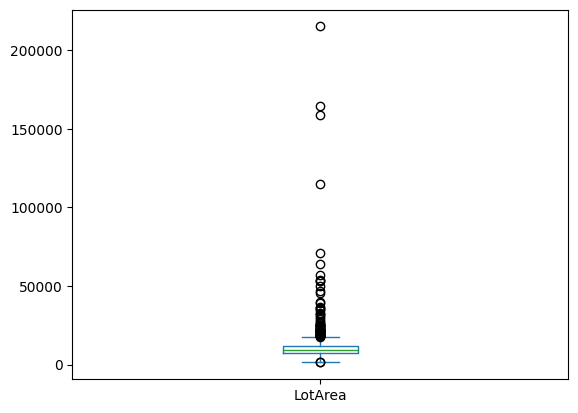

In [7]:
casas_analisis["LotArea"].plot.box()

<Axes: ylabel='Frequency'>

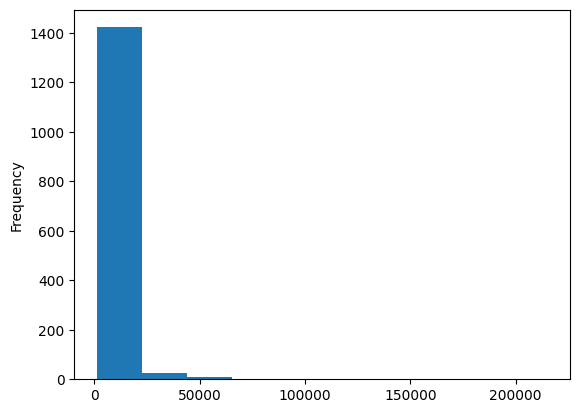

In [8]:
casas_analisis["LotArea"].plot.hist()

Corregimos las gráficas usando el *rango inter-cuartílico*

In [9]:
lotArea = casas_analisis["LotArea"]

lotArea.quantile(0.25), lotArea.quantile(0.75)

(np.float64(7553.5), np.float64(11601.5))

In [10]:
lotArea_IQR = lotArea.quantile(0.75) - lotArea.quantile(0.25); lotArea_IQR

np.float64(4048.0)

<Axes: >

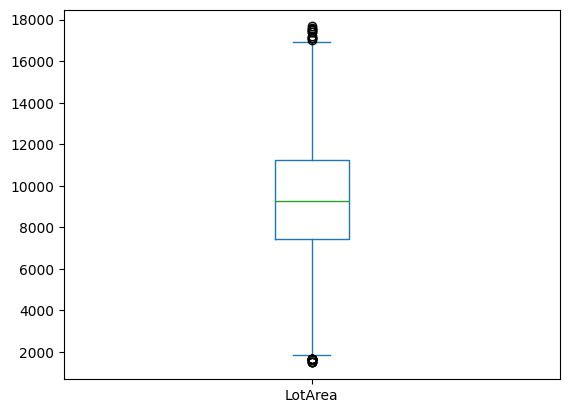

In [11]:
lotArea[
    (lotArea >= lotArea.quantile(0.25) - 1.5 * lotArea_IQR) &
    (lotArea <= lotArea.quantile(0.75) + 1.5 * lotArea_IQR)
].plot.box()

<Axes: ylabel='Frequency'>

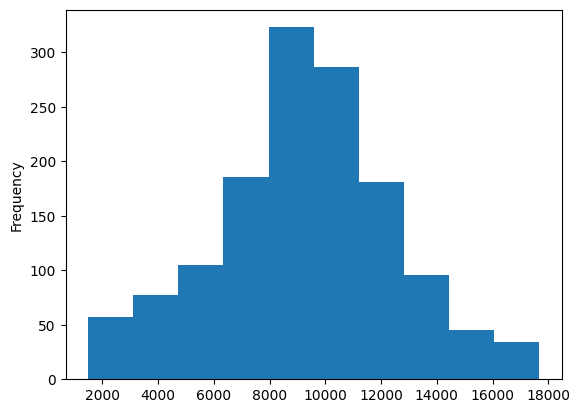

In [12]:
lotArea[
    (lotArea >= lotArea.quantile(0.25) - 1.5 * lotArea_IQR) &
    (lotArea <= lotArea.quantile(0.75) + 1.5 * lotArea_IQR)
].plot.hist()

Observamos que esta vez la distribución parece normal en el rango intercuartílico, por lo que trataremos los puntos atípicos de manera distinta con una transformación que los limite (*winzorizado*)

### Eje de datos 3 - Street

> Tipo de eje de datos: Cualitativo Nominal (binario)

El tipo de calle indica si está pavimentada o es grava (terracería).

* **Pave** - Pavimentada
* **Grvl** - Grava

Como tenemos dos clases, podemos hacer un análisis binario.

Observamos que más del $99\%$ de los datos tienen calle pavimentada, por lo que nos enfrentamos a un eje de datos de varianza casi cero.

In [13]:
casas_analisis["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [14]:
casas_analisis["Street"].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [15]:
casas_analisis["Street"].value_counts(normalize=True)

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64

<Axes: xlabel='Street'>

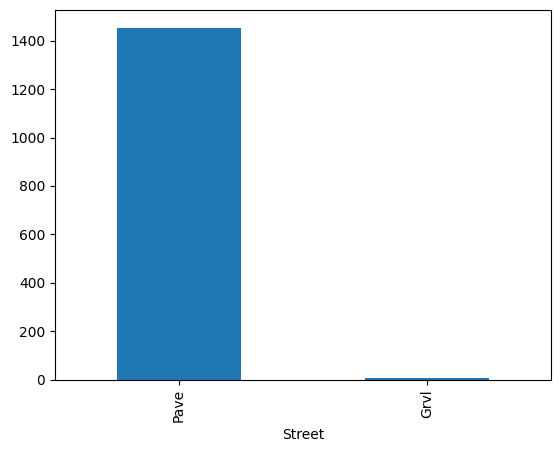

In [16]:
casas_analisis["Street"].value_counts().plot.bar()

### Eje de datos 4 - Neighborhood

> Tipo de eje de datos: Cualitativo Nominal (multiclase)

In [ ]:
casas_analisis["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [ ]:
casas_analisis["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

<Axes: xlabel='Neighborhood'>

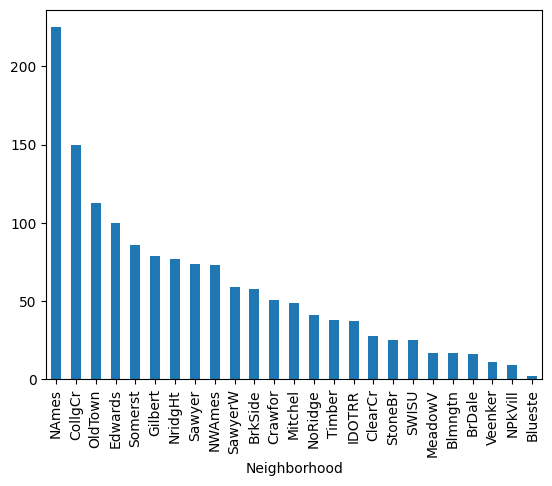

In [ ]:
casas_analisis["Neighborhood"].value_counts().plot.bar()

In [ ]:
casas_analisis["Neighborhood"].value_counts().index

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert',
       'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor',
       'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU',
       'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'],
      dtype='object', name='Neighborhood')

In [ ]:
indices, clases = zip(*enumerate(casas_analisis["Neighborhood"].value_counts().index))

pandas.Series(clases, index=indices).to_dict()

{0: 'NAmes',
 1: 'CollgCr',
 2: 'OldTown',
 3: 'Edwards',
 4: 'Somerst',
 5: 'Gilbert',
 6: 'NridgHt',
 7: 'Sawyer',
 8: 'NWAmes',
 9: 'SawyerW',
 10: 'BrkSide',
 11: 'Crawfor',
 12: 'Mitchel',
 13: 'NoRidge',
 14: 'Timber',
 15: 'IDOTRR',
 16: 'ClearCr',
 17: 'StoneBr',
 18: 'SWISU',
 19: 'MeadowV',
 20: 'Blmngtn',
 21: 'BrDale',
 22: 'Veenker',
 23: 'NPkVill',
 24: 'Blueste'}

NAmes      0
CollgCr    1
OldTown    2
Edwards    3
Somerst    4
dtype: int64
0      NAmes
1    CollgCr
2    OldTown
3    Edwards
4    Somerst
5      Other
dtype: object


<Axes: xlabel='Neighborhood'>

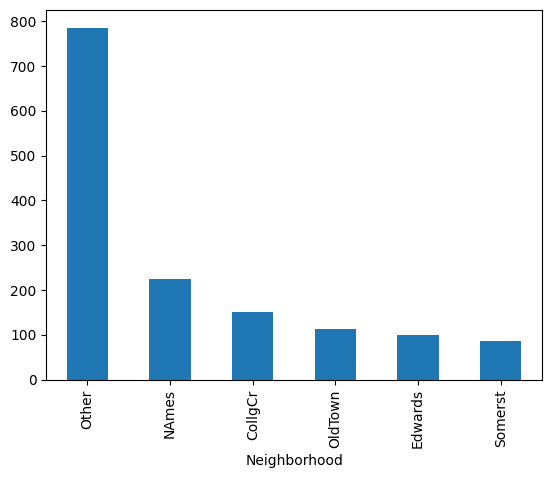

In [ ]:
neighborhood = casas_analisis["Neighborhood"]

indices, clases = zip(*enumerate(neighborhood.value_counts().index))

n = 5

a = pandas.Series(list(indices[:n]), index=list(clases[:n]))
b = pandas.Series(list(clases[:n]) + ["Other"], index=list(indices[:n]) + [n])

print(a)
print(b)

neighborhood.map(a).fillna(n).map(b).value_counts().plot.bar()

### Eje de datos 5 - YearBuilt

In [23]:
yearBuilt = casas_analisis["YearBuilt"]

yearBuilt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: YearBuilt
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [24]:
yearBuilt.describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<Axes: >

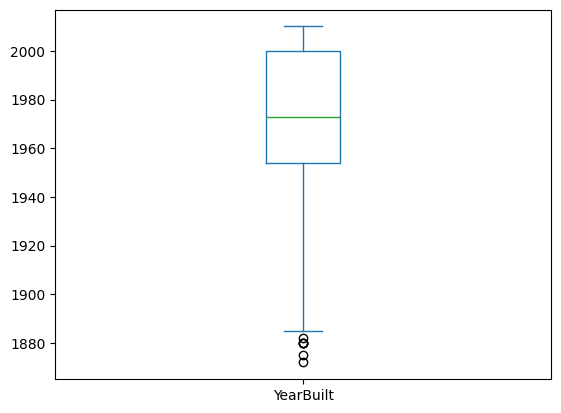

In [25]:
yearBuilt.plot.box()

<Axes: ylabel='Frequency'>

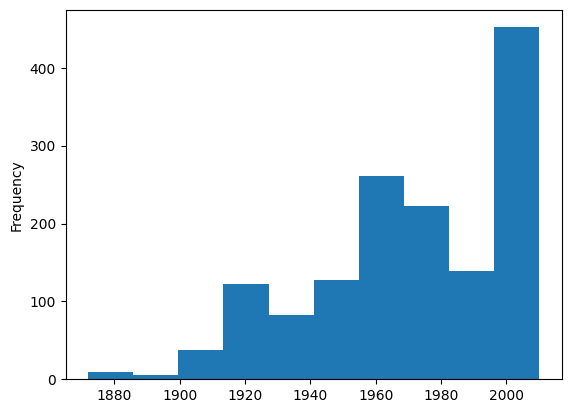

In [26]:
yearBuilt.plot.hist()

1973.0


<Axes: xlabel='YearBuilt'>

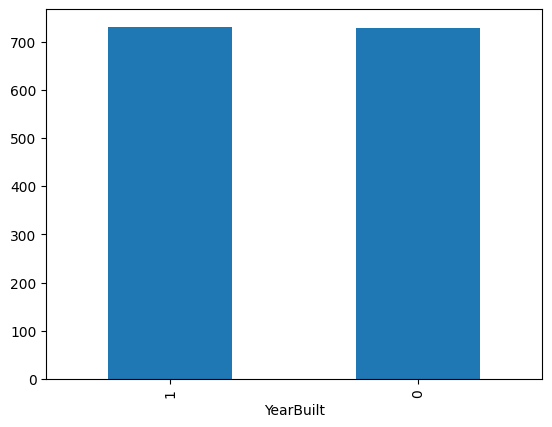

In [27]:
yearBuilt2 = yearBuilt * 0

year = yearBuilt.median()

print(year)

yearBuilt2[yearBuilt < year] = 0
yearBuilt2[yearBuilt >= year] = 1

yearBuilt2.value_counts().plot.bar()

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

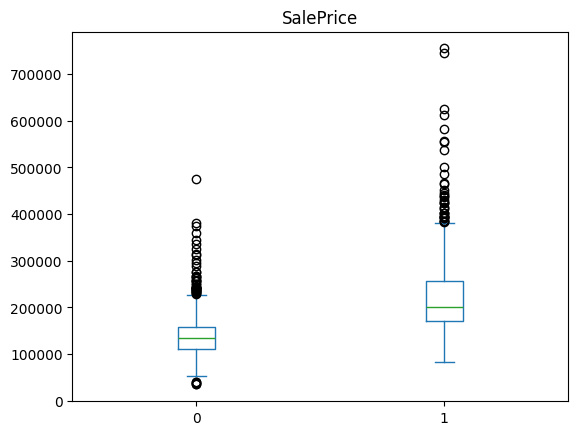

In [28]:
data = casas_analisis.copy()

data["Y"] = yearBuilt2

data[["SalePrice", "Y"]].plot.box("Y")

/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T/ipykernel_68879/2252526362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[["SalePrice", "Y"]].plot.box("Y")


SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

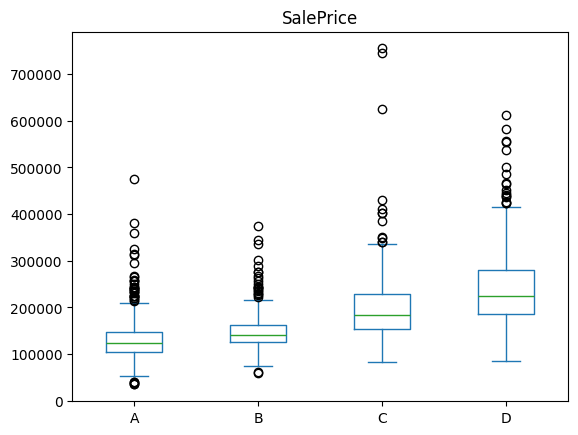

In [29]:
data = casas_analisis.copy()

data["Y"] = pandas.qcut(casas_analisis["YearBuilt"], q=4, 
            labels=["A", "B", "C", "D"])

data[["SalePrice", "Y"]].plot.box("Y")

In [31]:
casas_analisis["OverallCond"].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

<Axes: xlabel='OverallCond'>

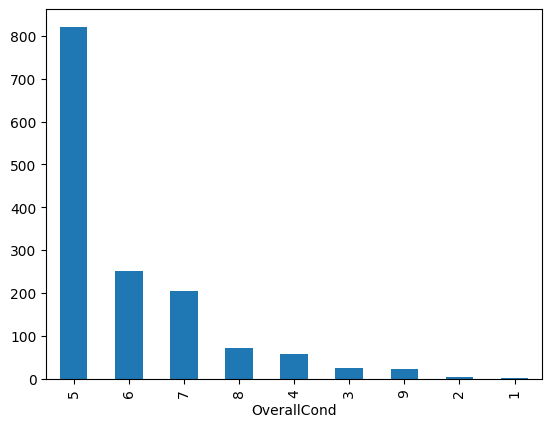

In [32]:
casas_analisis["OverallCond"].value_counts().plot.bar()